# Introduction

In [13]:
# IMPORTING LIBRARIES AND DEPENDENCIES:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
base = ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 
        'median_house_value', 'ocean_proximity']

# Data Preparation

In [4]:
df = df[base].fillna(df.median())

C:\Users\Frags\AppData\Local\Temp/ipykernel_19020/1641652984.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df[base].fillna(df.median())


In [5]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

# Question 1
What is the most frequent observation (mode) for the column ocean_proximity?

In [6]:
df['ocean_proximity'].value_counts()

# answer <1H OCEAN

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

# Question 2
What are the two features that have the biggest correlation in this dataset?

<AxesSubplot:>

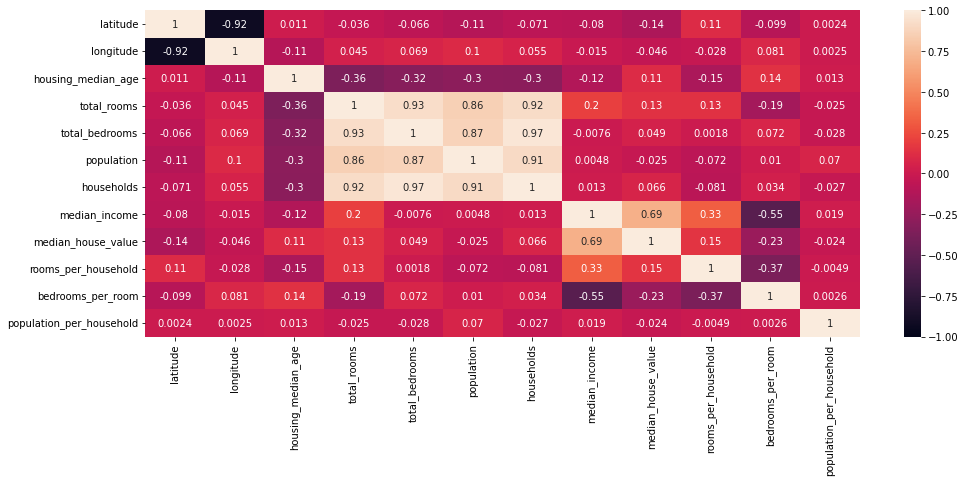

In [7]:
plt.figure(figsize=(16, 6))


sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True )

In [8]:
#@ INSPECTING CORRELATION:
df.corr().unstack().sort_values(ascending = False)[:15]

latitude                  latitude                    1.000000
longitude                 longitude                   1.000000
bedrooms_per_room         bedrooms_per_room           1.000000
rooms_per_household       rooms_per_household         1.000000
median_house_value        median_house_value          1.000000
median_income             median_income               1.000000
households                households                  1.000000
population                population                  1.000000
total_bedrooms            total_bedrooms              1.000000
total_rooms               total_rooms                 1.000000
housing_median_age        housing_median_age          1.000000
population_per_household  population_per_household    1.000000
total_bedrooms            households                  0.974366
households                total_bedrooms              0.974366
total_rooms               total_bedrooms              0.927058
dtype: float64

In [9]:
# answer total_bedrooms and households

# Target Variable & Data Splitting

In [10]:
data_class = df.copy()
mean = data_class['median_house_value'].mean()

data_class['above_average'] = np.where(data_class['median_house_value']>=mean,1,0)

In [11]:
data_class

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,1
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,1
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,1
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,1
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606,0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807,0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635,0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209,0


In [14]:
#@ SPLITTING THE DATASET:
df_train_full, df_test = train_test_split(data_class, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [15]:
#@ PROCESSING THE DATASET:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [16]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [17]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household', 'above_average'],
      dtype='object')

In [22]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

# Question 3
- Calculate the mutual information score between above_average and ocean_proximity. Use the training set only.
- Round it to 2 decimals using round(score,2)
- What is their mutual information score?

In [27]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, y_train)

In [28]:
categorical = ['ocean_proximity']

mi = df_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)


# Answer is 0.1

ocean_proximity    0.101384
dtype: float64

# Question 4
- One-hot encoding 'ocean_proximity'
- Fit the model with these parameters: model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits

In [30]:
dicts_train = df_train.to_dict(orient='records')

In [31]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dicts_train)

In [40]:
model = LogisticRegression(solver="liblinear", C=1.0, 
                           max_iter=1000, random_state=42)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [37]:
dicts_val = df_val.to_dict(orient='records')

In [38]:
X_val = dv.transform(dicts_val)

In [41]:
y_pred = model.predict(X_val)

In [44]:
round((y_pred == y_val).mean(),2)

# Answer is 0.84

0.84

# Question 5
- Find the least useful feature using the feature elimination technique
- Train a model with all these features (using the same parameters as in Q4)
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature
- Which of following feature has the smallest difference?
    - total_rooms
    - total_bedrooms
    - population
    - households

In [55]:
X_train = pd.DataFrame(X_train)
X_train.columns = dv.get_feature_names()

In [60]:
X_val = pd.DataFrame(X_val)
X_val.columns = dv.get_feature_names()

In [64]:
for col in X_train[['total_rooms','total_bedrooms','population','households']].columns:
    temp_X_train = X_train.drop(columns=[col])
    temp_X_val = X_val.drop(columns=[col])

    model = LogisticRegression(solver="liblinear", C=1.0, 
                           max_iter=1000, random_state=42)

    model.fit(temp_X_train, y_train)
    y_pred = model.predict(temp_X_val)
    
    without_col_acc = (y_pred == y_val).mean()
    
    
    model = LogisticRegression(solver="liblinear", C=1.0, 
                           max_iter=1000, random_state=42)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    with_col_acc = (y_pred == y_val).mean()

    print(col, with_col_acc - without_col_acc)
    
# Answer is total_rooms

total_rooms -0.0007267441860465684
total_bedrooms -0.0031492248062016115
population 0.009205426356589164
households 0.002422480620155043


# Question 6
- Use a linear regression model from Scikit-Learn
- Use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
- Fit the Ridge regression (model = Ridge(alpha=a, solver='sag', random_state=42)) on the training data
- This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
- Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest alpha.

In [65]:
df['median_house_value'] = np.log1p(df['median_house_value'])

In [67]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [68]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [69]:
cat = ['ocean_proximity']
num = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "rooms_per_household", 
       "bedrooms_per_room", "population_per_household"]

In [70]:
train_dict = df_train[cat + num].to_dict(orient='records')
val_dict = df_val[cat + num].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)

In [71]:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(a, round(score, 4))
    
# Answer is 0

0 0.5241
0.01 0.5241
0.1 0.5241
1 0.5241
10 0.5241
